# Pruebas y Manipulación del código

## 0. Importación de librerías

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from CMPendulum import pendulum as pend, animation as ani, basins as bs, plot_solutions as plot_
from scipy.optimize import curve_fit

In [2]:
import matplotlib.cm as cm

In [3]:
%matplotlib auto
%matplotlib auto

Using matplotlib backend: <object object at 0x000001DCCF602460>
Using matplotlib backend: TkAgg


## 1. Analisis inicial

Las condiciones iniciales corresponden a un conjunto de 3 imanes puestos sobre una circunferencia de radio 0.09 [$m$] de manera simetrica. 

<center> 
<img src="https://raw.githubusercontent.com/AndresGuarin/Images/main/Magnets_page-0001.jpg" width="350px" height="350px">
</center>

### A. Parámetros del código

In [20]:
# Physical parameters
l = 0.5
R = 0
d = 0.03
m = 0.05
mu_P_magn = 2

# Code parameters
h = 0.001
T0 = 2*np.pi*np.sqrt(l/9.8)  # Pendulum period
T = 2                        # Total time of simulation
N = int(T/h)

# Magnets
radio = 0.09 
ang = np.array([0,120,240])
Mx = radio*np.cos(np.deg2rad(ang)); My = radio*np.sin(np.deg2rad(ang))
mu = [-1.4]*3; u = [np.array([0,0,-1])]*3

In [21]:
# Functions
def set_pendulum(p):
    p.set_pendulum(R=R,l=l,d=d,m=m,mu_P_magn=mu_P_magn)
    p.set_code_parameters(h, N)
    p.set_magnets(Mx, My, [0,0,0], mu, u)

def find_path(p, CI, verbose=True):
    p.set_initial_conditions(CI, 'cartesians')
    inicio = time.time()
    p.find_path(show=False, Return='none')
    fin = time.time() 
    if verbose:
        print('Tiempo de ejecución: %.2f'%(fin-inicio))

def small_var(x0,y0,r, Nl):
    step = 2*np.pi/Nl
    CI=[]
    for i in range(Nl):
        CI.append([x0 + r*np.cos(step*i), y0 + r*np.sin(step*i),0,0])
    return CI

# Initial Conditions
x0, y0 = 0.08, 0.12
CI = [x0,y0,0,0]

# Small changes Conditions
CI_var = small_var(x0,y0,r=0.001, Nl=3)

# Create pendulum
p = pend.pendulum()
set_pendulum(p)

# Get data
find_path(p,CI)
K = p.get_kinetic_energy()
E = p.get_initial_energy()
X,Y,Vx,Vy = p.get_positions()


K_var = []
E_var = []
X1 = [0]*len(CI_var)
Y1 = [0]*len(CI_var)
Vx = []
Vy = []
for i in range(len(CI_var)):
    find_path(p,CI_var[i])
    K_var.append(p.get_kinetic_energy())
    E_var.append(p.get_initial_energy())
    X1[i], Y1[i], Vx, Vy = p.get_positions()

Tiempo de ejecución: 1.18
Tiempo de ejecución: 1.17
Tiempo de ejecución: 1.17
Tiempo de ejecución: 1.17


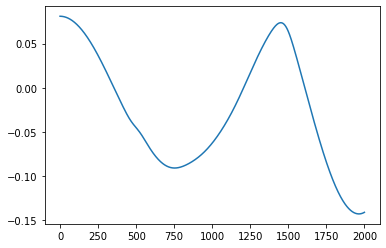

In [14]:
%matplotlib inline
plt.plot(range(len(X1[0])),X1[0])

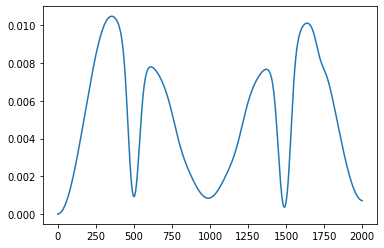

In [7]:
%matplotlib inline
plt.plot(range(len(K)),K)

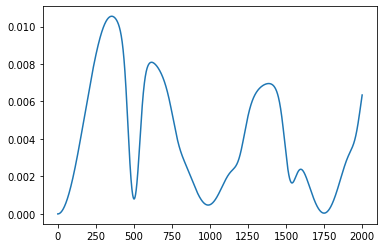

In [6]:
%matplotlib inline
plt.plot(range(len(K_var[1])),K_var[1])

0.6103942609755559


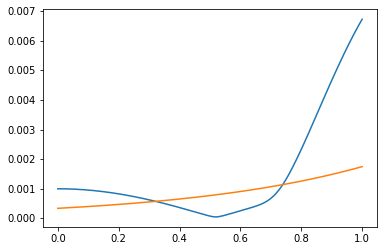

In [43]:
%matplotlib inline
i=0
d = np.sqrt((X-X1[i])**2 + (Y-Y1[i])**2)
#D = d
D = d[0:700]
T = np.linspace(0,1,len(D))
plt.plot(T,D)

def linear(D, m, b):
    return D*m + b

def exp2(T,m,b):
    return np.exp(m*T+b)

params, cov = curve_fit(linear,T,np.log(D))

t = np.linspace(0,1,200)
Yt = exp2(t,*params)
plt.plot(t,Yt)

L = params[0]
print(1/L)

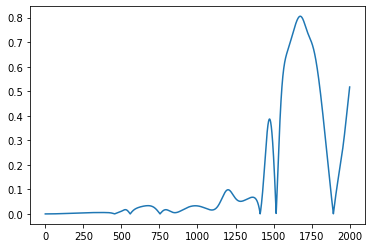

In [8]:
%matplotlib inline
plt.plot(range(len(K_var[1])),abs(K_var[1]-K)/E)

In [9]:
max(K)

0.010485861124730518

In [10]:
E

0.010906172887571581

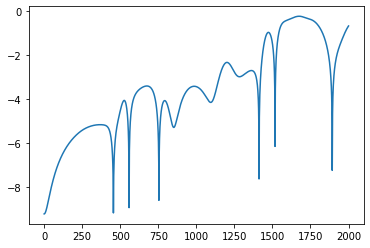

In [15]:
%matplotlib inline
plt.plot(range(len(K_var[1])),np.log(abs(K_var[1]-K)/E+0.0001))

In [106]:
E_var

[0.010990107699594473, 0.010973557538719132, 0.010756428304865773]

C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


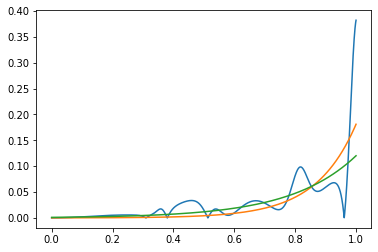

In [12]:
end=1470
%matplotlib inline
Y = abs(K_var[1][0:end]-K[0:end])/E
X = np.linspace(0,1,len(Y))

def exp(X,A,L,u):
    return A*np.exp(L*(X-u))

def linear(X,m,b):
    return m*X+b

eps = 0.0001
def exp2(X,m,b):
    return np.exp(m*X+b)- eps

params, cov = curve_fit(exp, X, Y)
var = np.sqrt(np.diag(cov))

params2, cov2 = curve_fit(linear,X,np.log(Y+eps))
var2 = np.sqrt(np.diag(cov2))

plt.plot(X,Y)
t = np.linspace(0,1,200)
Yt = exp(t,*params)
plt.plot(t,Yt)

Yt = exp2(t,*params2)
plt.plot(t,Yt)

In [13]:
params, params2

(array([1.45294565, 7.54662675, 1.27601666]),
 array([ 4.63001139, -6.74860814]))

In [14]:
L1 = params[1]
L2 = params2[0]
1/L1, 1/L2

(0.13250953484995756, 0.21598219005163902)

**Observaciones**
El valor de L2 tiene más sentido porque indica que el tiempo dodnde hay divergencia es en 0.21

LAMBDA:   3.76
TAO:      0.27
AMPLITUD: 0.001489


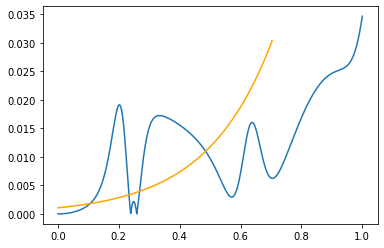

In [156]:
end = 2000
Y = abs(K_var[1][0:end]-K[0:end])/E
X = np.linspace(0,1,len(Y))
plt.plot(X,Y)

def derivada1(Y,a,b):
    return Y[a+2:b]-Y[a:b-2]

def val_over(Y,y0):
    for i in range(len(Y)):
        if Y[i] > y0:
            return i
    return 0
def raices(Y):
    l = []
    for i in range(len(Y)-1):
        if Y[i]*Y[i+1] < 0:
            l.append(i)
    return l

def find_end(Y,dy,y0=0.3):
    i = val_over(Y,y0)
    if i==0:
        print('ERROR')
        return 0
    raices_list = raices(derivada1(Y[i:],0,end-i))
    cc = 0
    for j in raices_list:
        if Y[i+j] < y0-dy:
            break
        cc += 1
    if cc==0:
        return i
    else:
        return i + raices_list[cc-1]

eps = 0.0001
def exp2(X,m,b):
    return np.exp(m*X+b)- eps

def fit_params(X,Y):
    def linear(X,m,b):
        return m*X+b
    params, cov = curve_fit(linear,X,np.log(Y+eps))
    var = np.sqrt(np.diag(cov2))
    return params, var
    
end_val = find_end(Y,dy=0.2,y0=0.2*max(Y))
#plt.plot(X[:end_val],Y[:end_val],'-r') #Zona de ajuste
params, var = fit_params(X[:end_val],Y[:end_val])

t=np.linspace(X[0],X[end_val],100)
Yt = exp2(t,*params2)
plt.plot(t,Yt,'orange')
print('LAMBDA:   %.2f'%(params[0]))
print('TAO:      %.2f'%(1/params[0]))
print('AMPLITUD: %.6f'%(np.exp(params[1])) )

In [151]:
end_val

0

0.2085611543093901


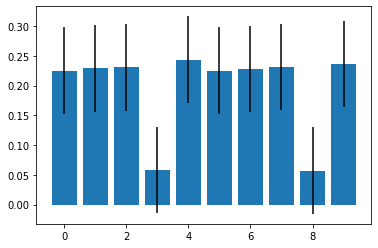

In [185]:
def find_Lambda(K,K_var,E, show=False):
    LAMBDAS = []
    VAR_LAMB = []
    for i in range(len(K_var)):
        Y = abs(K_var[i]-K)/E
        TAM = len(Y)
        X = np.linspace(0,h*TAM,TAM)
        end_val = find_end(Y,dy=0.2,y0=0.2*max(Y))
        params, var = fit_params(X[:end_val],Y[:end_val])
        LAMBDAS.append(params[0])
        VAR_LAMB.append(var[0])
    TAM = len(LAMBDAS)
    l = np.sqrt(sum([LAMBDAS[i]**2 for i in range(TAM)])/TAM)
    dl= np.sqrt(sum([VAR_LAMB[i]**2 for i in range(TAM)])/TAM)
    
    if show:
        plt.bar(np.arange(TAM),LAMBDAS,yerr=VAR_LAMB)
    return l, dl

l, dl = find_Lambda(K,K_var,E,show=True)
print(l)

In [189]:
NUM = 20
tt = np.linspace(-0.12,0.12,NUM)
tx, ty = np.meshgrid(tt,tt)
MatrixL = np.zeros((NUM,NUM))
dL = np.zeros((NUM,NUM))

# Create pendulum
p = pend.pendulum(); set_pendulum(p)

for i in range(NUM):
    for j in range(NUM):
        x0, y0 = tx[i,j], ty[i,j]
        CI_var = small_var(x0,y0,r=0.001, Nl=5)
        find_path(p,[x0,y0,0,0],verbose=False)
        K = p.get_kinetic_energy()
        E = p.get_initial_energy()
        K_var = []
        for m in range(len(CI_var)):
            find_path(p,CI_var[m],verbose=False)
            K_var.append(p.get_kinetic_energy())
        MatrixL[j,i], dL[j,i] = find_Lambda(K,K_var,E)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


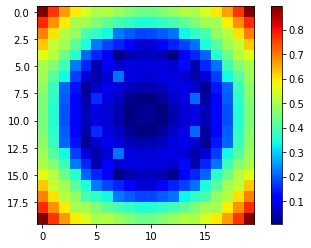

In [191]:
M = MatrixL.T
plt.imshow(M,cmap=cm.jet)
plt.colorbar()

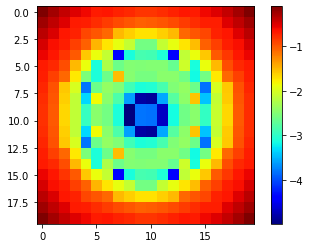

In [190]:
M = np.log(MatrixL.T)
plt.imshow(M,cmap=cm.jet)
plt.colorbar()

In [192]:
M, dL

(array([[0.89478777, 0.76410826, 0.66656751, 0.59024146, 0.54909344,
         0.50142647, 0.51202417, 0.4836347 , 0.46043756, 0.43683372,
         0.43982607, 0.45973528, 0.48255416, 0.51251906, 0.50104155,
         0.55055003, 0.59487523, 0.66444724, 0.76342678, 0.8938457 ],
        [0.77617769, 0.67868624, 0.59009639, 0.4978825 , 0.49415542,
         0.45566583, 0.41993088, 0.3928944 , 0.37224396, 0.35203969,
         0.35378958, 0.37144131, 0.39092315, 0.41903572, 0.45462294,
         0.4953522 , 0.49401779, 0.58933323, 0.67850622, 0.77426492],
        [0.69359692, 0.60081313, 0.51181455, 0.48061946, 0.39850366,
         0.3720787 , 0.33822596, 0.22201018, 0.19827579, 0.18005645,
         0.18111424, 0.19838957, 0.22134398, 0.33617249, 0.36999122,
         0.39698347, 0.47798024, 0.51030842, 0.59999627, 0.69397857],
        [0.62308795, 0.5278397 , 0.49255918, 0.41821927, 0.34997371,
         0.22401425, 0.17725161, 0.14898451, 0.12107487, 0.07525162,
         0.07422766, 0.12107445

In [195]:
for i in range(20):
    print('fila: ',i,'M = ',M[i,:], 'dL = ',dL[i,:])

fila:  0 M =  [0.89478777 0.76410826 0.66656751 0.59024146 0.54909344 0.50142647
 0.51202417 0.4836347  0.46043756 0.43683372 0.43982607 0.45973528
 0.48255416 0.51251906 0.50104155 0.55055003 0.59487523 0.66444724
 0.76342678 0.8938457 ] dL =  [0.07283938 0.07283938 0.07283938 0.07283938 0.07283938 0.07283938
 0.07283938 0.07283938 0.07283938 0.07283938 0.07283938 0.07283938
 0.07283938 0.07283938 0.07283938 0.07283938 0.07283938 0.07283938
 0.07283938 0.07283938]
fila:  1 M =  [0.77617769 0.67868624 0.59009639 0.4978825  0.49415542 0.45566583
 0.41993088 0.3928944  0.37224396 0.35203969 0.35378958 0.37144131
 0.39092315 0.41903572 0.45462294 0.4953522  0.49401779 0.58933323
 0.67850622 0.77426492] dL =  [0.07283938 0.07283938 0.07283938 0.07283938 0.07283938 0.07283938
 0.07283938 0.07283938 0.07283938 0.07283938 0.07283938 0.07283938
 0.07283938 0.07283938 0.07283938 0.07283938 0.07283938 0.07283938
 0.07283938 0.07283938]
fila:  2 M =  [0.69359692 0.60081313 0.51181455 0.48061946 0

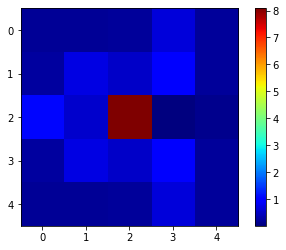

In [175]:
M = MatrixL.T
plt.imshow(M,cmap=cm.jet)
plt.colorbar()

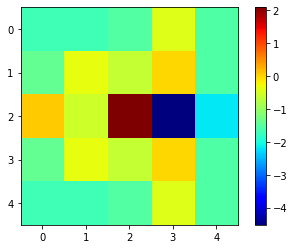

In [182]:
M = np.log(MatrixL.T)
plt.imshow(M,cmap=cm.jet)
plt.colorbar()

(-0.15, 0.15)

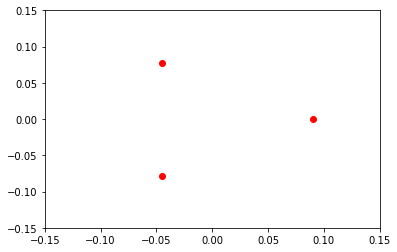

In [177]:
for i in range(3):
    plt.plot(Mx[i],My[i],'or')
plt.xlim(-0.15,0.15)
plt.ylim(-0.15,0.15)

In [178]:
tx,ty

(array([[-0.12, -0.06,  0.  ,  0.06,  0.12],
        [-0.12, -0.06,  0.  ,  0.06,  0.12],
        [-0.12, -0.06,  0.  ,  0.06,  0.12],
        [-0.12, -0.06,  0.  ,  0.06,  0.12],
        [-0.12, -0.06,  0.  ,  0.06,  0.12]]),
 array([[-0.12, -0.12, -0.12, -0.12, -0.12],
        [-0.06, -0.06, -0.06, -0.06, -0.06],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.06,  0.06,  0.06,  0.06,  0.06],
        [ 0.12,  0.12,  0.12,  0.12,  0.12]]))